In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, norm

from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
plt.ion()
plt.show()

np.random.seed(1)

In [2]:
## Generate a compound poisson process, of intensity mu with num_event event. 
def generate_poisson_process(mu, num_events):
    time_intervals = -np.log(np.random.random(num_events)) / mu
    total_events = time_intervals.cumsum()
    events = pd.DataFrame(np.ones(num_events), index=total_events)
    events[0] = events[0].cumsum()
    return events



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


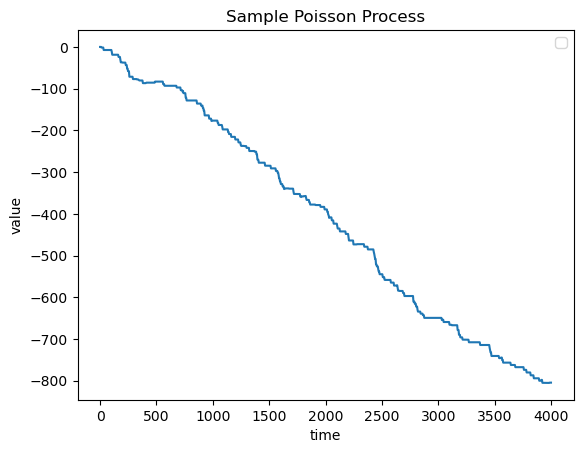

In [22]:
def generate_cpp(mu, timeMAX):
    size_time = 1000 +1
    
    parameters = np.array([[0, 1],
                           [-6,  1]])
    weights = np.array([0.3, 0.7])
    
    time_space = np.linspace(0, timeMAX, size_time)
    dt = time_space[1]-time_space[0]
    
    number_jump = poisson.rvs(mu * dt, size=size_time-1)
    #print(number_jump)
    process = np.zeros(size_time)
    
    for i in range(size_time-1):
        mixture = np.random.choice(len(weights), size = number_jump[i], replace=True, p = weights)
        aux = np.array([norm.rvs(*(parameters[j])) for j in mixture])
        #aux = np.array([gamma.rvs(3, size=number_jump[i])])
        process[i+1] = process[i] + np.sum(aux)
    #return (time_space, process + norm.rvs(0,0.5, size_time))
    return (time_space, process )
    
time, process = generate_cpp(1/20, 4000)
#plt.plot(time, process, marker='.', linestyle='none')
plt.plot(time, process)
plt.title("Sample Poisson Process")
plt.xlabel("time")
plt.ylabel("value")
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


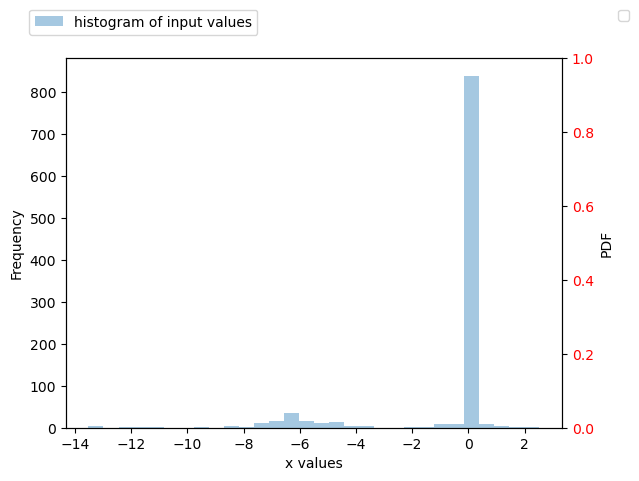

In [23]:
def plotHistogramAndPdf(data):
    x = np.linspace(np.min(data),np.max(data), len(data)-1)
    ax = plt.gca()
    plt.hist(data, bins = 30, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    #plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))
    plt.savefig('figures/hist.jpg', bbox_inches='tight')

data = [process[i+1]-process[i] for i in range(len(process)-1)]
x = np.linspace(np.min(data),np.max(data), 1000)

plotHistogramAndPdf(data)

# Kernel density estimations



x:  -1.3261345465324897e+01  | y:  0.002733257622371258
x:  -11.302167481129386  | y:  0.00373764365064401
x:  -6.259692997216349  | y:  0.04712302583088383
x:  0.003253017834875749  | y:  0.8456821094410768
[ 16 138 452 842]


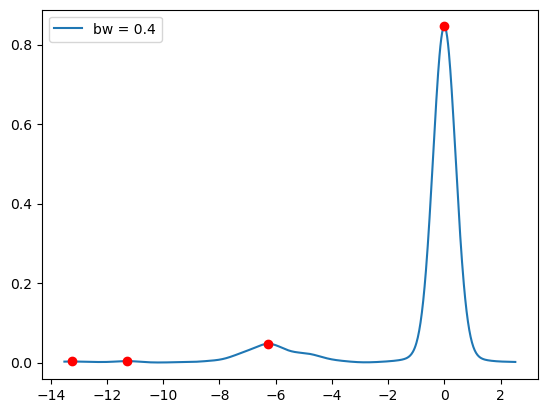

In [24]:
def GaussianKernel(u):
    return np.exp(-0.5*u**2)/(np.sqrt(2*np.pi))
def RosenblattKernel(u):
    if (-1<= u <= 1):
        return 0.5
    else:
        return 0

def KernelEstimator(u, data, h, kernel):
    N = len(data)
    value = 0
    for k in range(N):
        value = value + kernel((u-data[k])/h)
    return value/(N * h)

import numpy as np

# for local maxima

for h in [0.4]:
    y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
    local_max = argrelextrema(y, np.greater)
    plt.plot(x, y, label='bw = '+str(h))
    plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 
    
print(local_max[0])
    


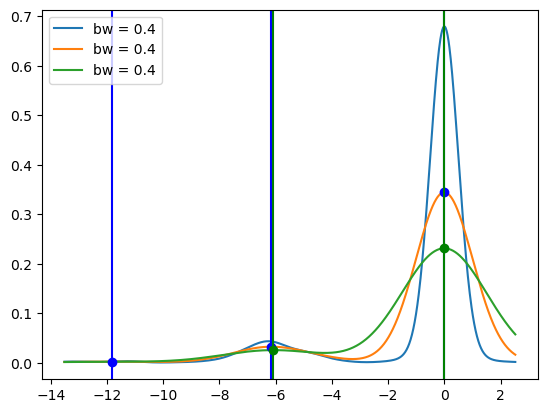

In [25]:

y1 = np.array([KernelEstimator(i, data, 0.5, GaussianKernel) for i in x])
local_max1 = argrelextrema(y1, np.greater)

y2 = np.array([KernelEstimator(i, data, 1, GaussianKernel) for i in x])
local_max2 = argrelextrema(y2, np.greater)

y3 = np.array([KernelEstimator(i, data, 1.5, GaussianKernel) for i in x])
local_max3 = argrelextrema(y3, np.greater)

plt.plot(x, y1, label='bw = '+str(h))
plt.plot(x, y2, label='bw = '+str(h))
plt.plot(x, y3, label='bw = '+str(h))

#plt.plot([x[i] for i in local_max1], [y1[i] for i in local_max1], 'ro')
#for i in local_max1[0]:
#    plt.axvline(x[i], color='red')
plt.plot([x[i] for i in local_max2], [y2[i] for i in local_max2], 'bo')
for i in local_max2[0]:
    plt.axvline(x[i], color='blue')
plt.plot([x[i] for i in local_max3], [y3[i] for i in local_max3], 'go')
for i in local_max3[0]:
    plt.axvline(x[i], color='green')

plt.legend(loc='best')

# Find the critical $h_*$

0 1 0 5.0
1 1 0 2.5
2 3 1.25 2.5
3 1 1.25 1.875
4 2 1.5625 1.875
5 2 1.71875 1.875
6 1 1.71875 1.796875
7 2 1.7578125 1.796875
8 2 1.77734375 1.796875
9 1 1.77734375 1.787109375
10 1 1.77734375 1.7822265625
11 1 1.77734375 1.77978515625
12 2 1.778564453125 1.77978515625
13 2 1.7791748046875 1.77978515625
14 1 1.7791748046875 1.77947998046875
15 1 1.7791748046875 1.779327392578125
16 2 1.7792510986328125 1.779327392578125
17 2 1.7792892456054688 1.779327392578125
18 2 1.7793083190917969 1.779327392578125
19 2 1.779317855834961 1.779327392578125
20 2 1.779322624206543 1.779327392578125
21 1 1.779322624206543 1.779325008392334
22 2 1.7793238162994385 1.779325008392334
23 1 1.7793238162994385 1.7793244123458862
24 2 1.7793241143226624 1.7793244123458862
25 1 1.7793241143226624 1.7793242633342743
26 1 1.7793241143226624 1.7793241888284683
27 1 1.7793241143226624 1.7793241515755653
28 2 1.7793241329491138 1.7793241515755653
29 2 1.7793241422623396 1.7793241515755653
hcrit 1.7793241422623396


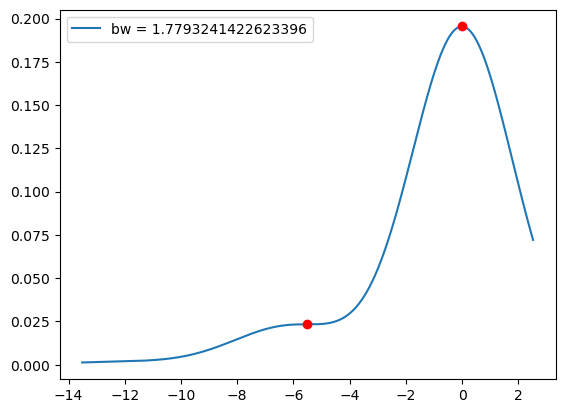

In [26]:
def critical_value(hmax, num_mode):
    hmin_test=0
    hmax_test=hmax
    for iter in range(30):
        h_test = 0.5*(hmin_test+hmax_test)
        y = np.array([KernelEstimator(i, data, h_test, GaussianKernel) for i in x])
        local_max = argrelextrema(y, np.greater)
        if len(local_max[0])<= num_mode:
            hmax_test = h_test
            print(iter, len(local_max[0]), hmin_test, hmax_test)
        else:
            hmin_test = h_test
            print(iter, len(local_max[0]), hmin_test, hmax_test)
    return hmin_test

hcrit = critical_value(10, 1)
h = hcrit
print('hcrit', h)

y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
local_max = argrelextrema(y, np.greater)
plt.plot(x, y, label='bw = '+str(h))
plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 
            

x:  -1.2805818101153221e-02  | y:  0.19539329971622993


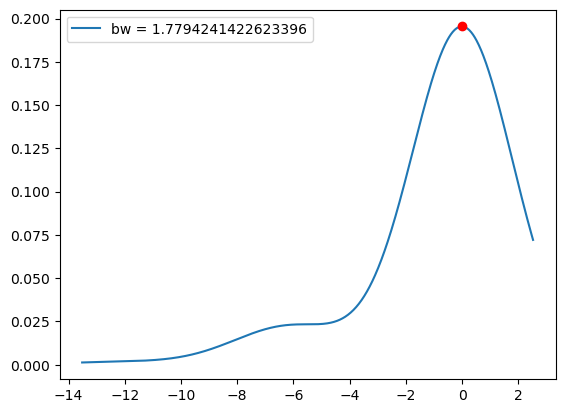

In [27]:
h = hcrit+0.0001
y = np.array([KernelEstimator(i, data, h, GaussianKernel) for i in x])
local_max = argrelextrema(y, np.greater)
plt.plot(x, y, label='bw = '+str(h))
plt.plot([x[i] for i in local_max], [y[i] for i in local_max], 'ro')
plt.legend(loc='best')

for i in local_max[0]:
    print('x: ', x[i], ' | y: ', y[i]) 

# Find the good h.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


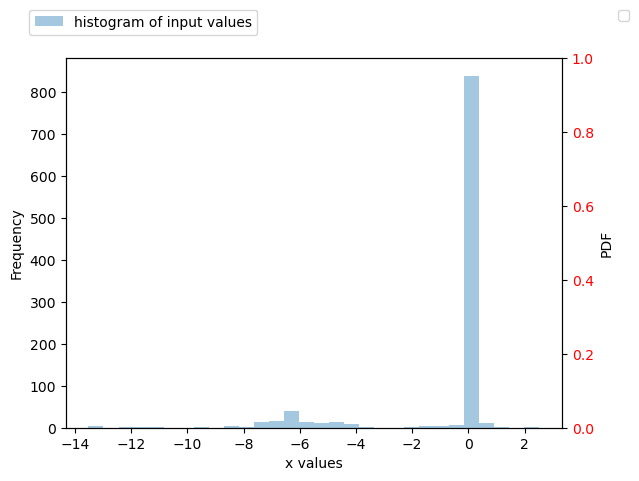

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


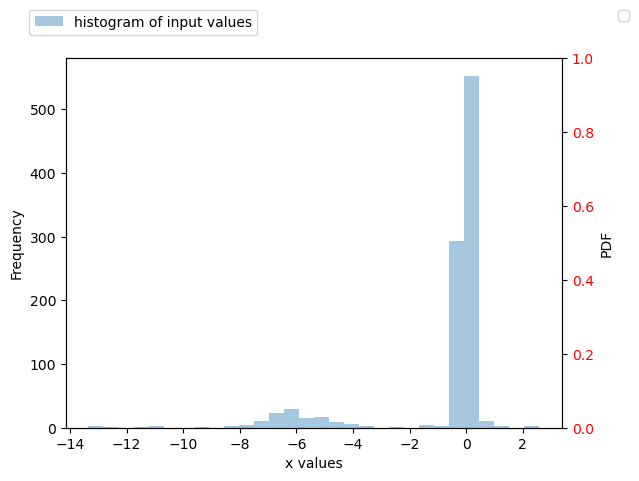

In [74]:
sizeData = len(data)
sig = np.std(data)


new_ind = np.random.randint(sizeData, size=sizeData) 
new_sample = np.array([data[i] for i in new_ind])

plotHistogramAndPdf(new_sample)
plt.show()

new_sam = new_sample + hcrit * norm.rvs(0,1, sizeData)
new_sam = new_sam / np.sqrt(1+(hcrit)**2 / sig**2)

plotHistogramAndPdf(new_sam)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


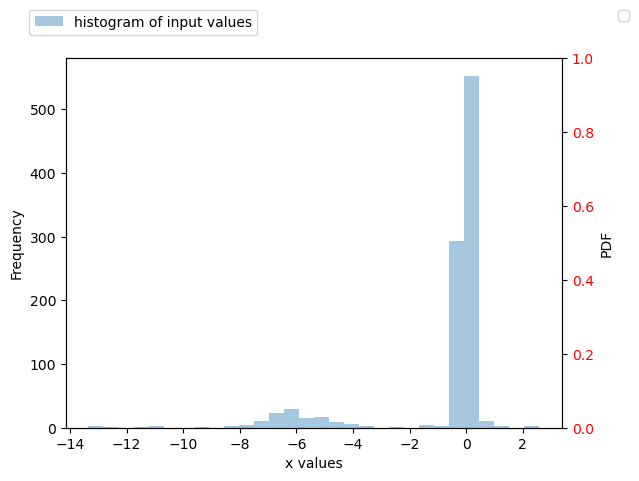

In [75]:
plotHistogramAndPdf(new_sam)

x:  -1.2805818101153221e-02  | y:  0.19539329971622993


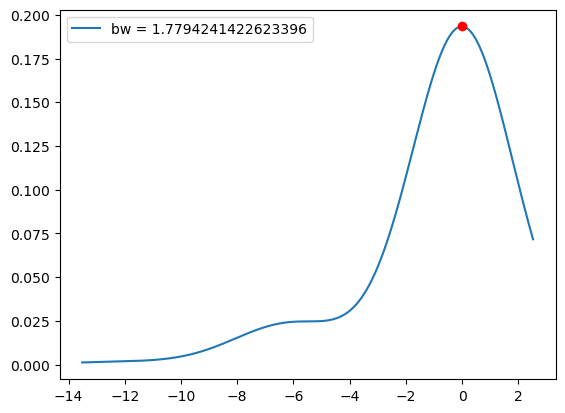

In [76]:
ybis = np.array([KernelEstimator(i, new_sam, hcrit, GaussianKernel) for i in x])
local_maxbis = argrelextrema(ybis, np.greater)
plt.plot(x, ybis, label='bw = '+str(h))
plt.plot([x[i] for i in local_maxbis], [ybis[i] for i in local_maxbis], 'ro')
plt.legend(loc='best')

for i in local_maxbis[0]:
    print('x: ', x[i], ' | y: ', y[i]) 

# Iterative Methods

In [77]:
sizeData = len(data)
sig = np.std(data)
k = 1
N = 100

num_ok = 0
for iter in range(N):
    new_ind = np.random.randint(sizeData, size=sizeData) 
    new_sample = np.array([data[i] for i in new_ind])

    new_sam = new_sample + hcrit * norm.rvs(0,1, sizeData)
    new_sam = new_sam / np.sqrt(1+hcrit**2 / sig**2)

    ybis = np.array([KernelEstimator(i, new_sam, hcrit, GaussianKernel) for i in x])
    local_maxbis = argrelextrema(ybis, np.greater)
    if len(local_maxbis[0]) <= k:
        num_ok = num_ok + 1
        
print('p-value', num_ok/N)

p-value 1.0
